In [37]:
import os 
import tensorflow as tf
from tensorflow.keras import preprocessing, optimizers, losses,metrics
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


In [2]:
def load_image(path, labels):
    ims, labs = [], []
    for file in os.listdir(path):
        #print(file)
        if (file.endswith(".jpg")) or (file.endswith("png")):
            img = image.load_img(os.path.join(path, file), target_size=(224, 244,3))
            #print(img)
            
            ims.append(image.img_to_array(img))
            labs.append(labels)
    return ims, labs
    

In [3]:
data, labels = [], []

In [4]:
ims, labs = load_image('./flower_images/Lilly', 0)


In [5]:
data += ims
labels += labs


In [6]:
ims, labs = load_image('./flower_images/Lotus',1)

In [7]:
data += ims
labels += labs


In [8]:
ims, labs = load_image('./flower_images/Orchid', 2)
data += ims
labels += labs

In [9]:
ims, labs = load_image('./flower_images/Sunflower', 3)
data += ims
labels += labs

In [10]:
ims, labs = load_image('./flower_images/Tulip', 4)
data += ims
labels += labs

In [11]:
import sklearn as skl
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42)

In [13]:
import numpy as np

In [14]:
x_train = np.array(x_train)/255

In [15]:
x_test = np.array(x_test)/255

In [16]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [19]:
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU, BatchNormalization, Input

In [18]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224, 224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.add(Dropout(0.1))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     3,277,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         5,125 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,560,709 (13.58 MB)

 Trainable params: 3,560,709 (13.58 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=20)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 63s 165ms/step - accuracy: 0.3719 - loss: 2.7664 - val_accuracy: 0.2728 - val_loss: 1.5269
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 157ms/step - accuracy: 0.4197 - loss: 2.6267 - val_accuracy: 0.5480 - val_loss: 1.1488
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 158ms/step - accuracy: 0.5095 - loss: 2.6049 - val_accuracy: 0.5272 - val_loss: 1.1732
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 62s 164ms/step - accuracy: 0.5207 - loss: 2.4768 - val_accuracy: 0.4976 - val_loss: 2.3717
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 61s 162ms/step - accuracy: 0.5485 - loss: 2.4118 - val_accuracy: 0.6152 - val_loss: 1.2081
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 60s 160ms/step - accuracy: 0.6307 - loss: 1.9797 - val_accuracy: 0.6168 - val_loss: 1.3628
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 61s 163ms/step - accuracy: 0.6758 - loss: 1.7891 - val_accuracy: 0.6520 - val_loss: 1.8975
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 69s 185ms/step - accuracy: 0.6988 - loss: 1

[]

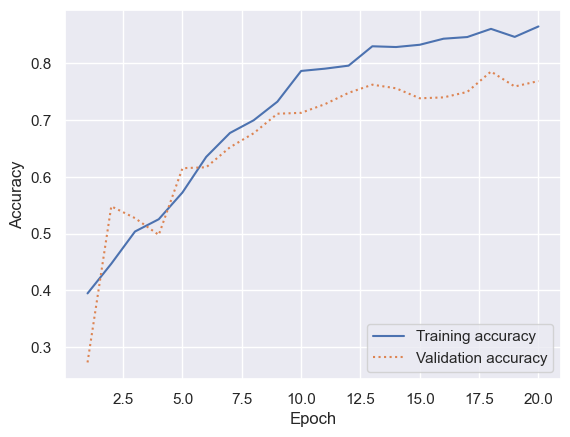

In [20]:
import seaborn as sns

sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val,':',label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [30]:

testi, testl = load_image('./val',2)

testi = np.array(testi) / 255

In [31]:
pred = model.predict(testi)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


In [32]:
pred

array([[9.7813028e-01, 1.0554899e-17, 2.1869654e-02, 5.7219670e-17,
        3.6030653e-16],
       [3.5056975e-05, 1.1330059e-21, 9.9996501e-01, 2.3989055e-19,
        3.4382587e-16],
       [2.8592831e-01, 7.0310789e-01, 7.9162540e-03, 2.8033627e-03,
        2.4426394e-04],
       [1.5385270e-04, 7.1986117e-16, 1.3566956e-04, 4.7687176e-14,
        9.9971050e-01],
       [9.9498380e-18, 1.0000000e+00, 1.9933295e-33, 9.1501971e-23,
        1.3107258e-36],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.9061855e-22],
       [3.9120250e-31, 0.0000000e+00, 9.5064734e-36, 1.0000000e+00,
        2.3290293e-37]], dtype=float32)

In [24]:
len(pred)

7